[Oregon Curriculum Network](http://4dsolutions.net/ocn/)<br/>
[School of Tomorrow](School_of_Tomorrow.ipynb)


# HYPERSNAKES!

Snake-in-a-Box, an n-Dimensional box.


![Snake In The Box](https://imgs.xkcd.com/comics/snake_in_the_box_problem.png)

Primary references:

* [New Lower Bounds for Snake-in-the-Box in 11-, 12-, and 13-dimensional Hypercubes](https://minortriad.com/snake/snake-6nov25.pdf) by Tom Ace
* [Snake in the Box Lower Bounds](https://minortriad.com/snake/) by Tom Ace

In [1]:
from IPython.display import YouTubeVideo

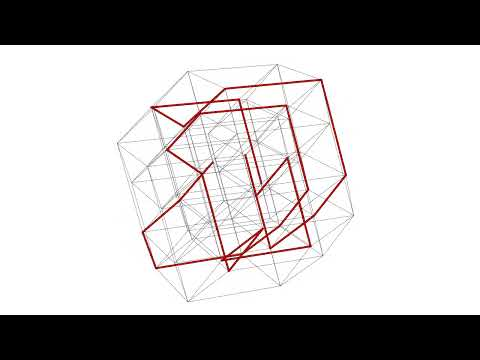

In [2]:
YouTubeVideo("5wPoS4Cj_rU")

The utility functions below are about the shorthand used in the hypersnake lore, which compresses the sequence of vertexes to a compact hexadecimal code focusing on what's changing in the underlying binary coordinates, as one advances along the snake's body.

One of the first methods we'll need is for computing [Hamming Distance](https://en.wikipedia.org/wiki/Hamming_distance), the number of bits that differ between two bit strings. 

The hypersnake is a contiguous set of nodes each one Hamming unit apart from the next.

In addition, the hypersnake is never supposed to come within Hamming distance 1 of itself.

### Sandbox

Use the area below to develop the components of a complete working method.

In [3]:
"{:0b}".format(int("11011001", 2))

'11011001'

In [4]:
f"{0b11011001 ^ 0b10011101:0b}".count('1')

2

In [5]:
int('2a9', 16)

681

In [6]:
"{:0b}".format(int('2a9', 16))

'1010101001'

In [7]:
nodes = "d-1d-19-1b-1a-12".split("-")
list(zip(nodes[:-1], nodes[1:]))

[('d', '1d'), ('1d', '19'), ('19', '1b'), ('1b', '1a'), ('1a', '12')]

### Methods

Technically, in the Python language, these are functions, not methods. However we're permitted common English with respect to algorithms or formulae, accepting of input, producing of output.

The difference between functions and methods in Python nomenclature is that the latter are embedded with classes, meaning they comprise a suite of behaviors associated with each instance of each class.

In [8]:
def hamming(a : str, b : str) -> int:
    '''
    Take two bitstrings (1s and 0s) and evaluate the Hamming distance between them.
    
    >>> hamming("11011001", "10011101")
    2
    
    >>> hamming("010", "101")
    3
    '''
    return "{:0b}".format(int(a, 2) ^ int(b, 2)).count('1')

Below, we're going to express bitstrings using hexadecimals. We'll want a version of hamming that eats hex strings and returns Hamming distance.

In [9]:
def hexhamming(a : str, b: str) -> int:
    '''
    Take turn two hexstrings into bitstrings and evaluate the Hamming distance between them.
    
    >>> hexhamming('2a9', '2ad')
    1
    
    >>> hexhamming('37b', '379')
    1
    '''    
    return hamming("{:0b}".format(int(a, 16)), "{:0b}".format(int(b, 16)))

In [10]:
hexhamming('2a9', '2ad')

1

Next, we need to encode the sequence of vertices in a compressed shorthand used by hypersnake wranglers. The input is a sequence of vertices expressed in binary. The output is the route in turns of bit flips. Which bits flip as we trace out a snake? 

Chunk the output into segments of length 10 or less.

In [11]:
def compress(snake : str, n: int) -> str:
    '''
    >>> compress("000,001,011,111,110", 3)
    '0120'
    
    >>> compress('00000,00001,00011,00111,01111,01110,01010,11010,10010,10110,10100,11100,11101,11001', 5)
    '0123024321 302'
    '''
    result = ""
    segs = snake.split(",")
    ctr = 0
    for seg0, seg1 in zip(segs, segs[1:]):
        if ctr == 10:
            result += " "
            ctr = 1
        else:
            ctr += 1
        diff = list(reversed([i==j for i,j in zip(list(seg0), list(seg1))]))
        result += str(diff.index(False))
    return result.rstrip()

In [12]:
compress("000,001,011,111,110", 3)

'0120'

In [13]:
compress('00000,00001,00011,00111,01111,01110,01010,11010,10010,10110,10100,11100,11101,11001', 5)

'0123024321 302'

The inverse of compress would be decompress:

In [14]:
def decompress(flips : str, n : int) -> str:
    """
    >>> decompress("0120", 3)
    '000,001,011,111,110'

    >>> decompress("0123024321 302", 5)
    '00000,00001,00011,00111,01111,01110,01010,11010,10010,10110,10100,11100,11101,11001'

    >>> decompress("0123104305 4013402410 431534", 6)
    '000000,000001,000011,000111,001111,001101,001100,011100,010100,010101,110101,100101,100100,100110,101110,111110,111111,111011,101011,101001,101000,111000,110000,110010,010010,011010,001010'
    """
    bits = [False] * n
    result = "0"*n
    for flipper in [int(i) for i in list(flips) if i != " "]:
        bits[flipper] = not bits[flipper]
        result += "," + "".join([str(int(bit)) for bit in reversed(bits)])
    return result

We may also express successive vertices as hexademicals, and convert these to binary strings. 

These binary strings should, in turn, correspond to the decompressed route.

In [15]:
def vert_seq(hexverts : str, n : int):
    '''
    >>> vert_seq("0-1-3-7-6", 3)
    '000,001,011,111,110'

    >>> vert_seq("0-1-3-7-f-e-a-1a-12-16-14-1c-1d-19", 5)
    '00000,00001,00011,00111,01111,01110,01010,11010,10010,10110,10100,11100,11101,11001'
    '''
    result = ""
    for seq in hexverts.split("-"):
        fm = "{:>0"+str(n)+"}"
        result += fm.format(bin(int(seq, 16))[2:]) + ","
    return result[:-1]

### n = 3

In [16]:
decompress("0120", 3)

'000,001,011,111,110'

In [17]:
vert_seq("0-1-3-7-6", 3)

'000,001,011,111,110'

In [18]:
decompress("0120", 3) ==  vert_seq("0-1-3-7-6", 3)

True

### n = 5

In [19]:
decompress("0123024321 302", 5)

'00000,00001,00011,00111,01111,01110,01010,11010,10010,10110,10100,11100,11101,11001'

In [20]:
vert_seq("0-1-3-7-f-e-a-1a-12-16-14-1c-1d-19", 5)

'00000,00001,00011,00111,01111,01110,01010,11010,10010,10110,10100,11100,11101,11001'

In [21]:
decompress("0123024321 302", 5) == vert_seq("0-1-3-7-f-e-a-1a-12-16-14-1c-1d-19", 5)

True

### n = 7

In [22]:
len(decompress("0120310421 0350124065 0420340124 0350420340 1206240124", 7).split(","))

51

In [23]:
vert_seq("0-1-3-7-6-e-c-d-1d-19-1b-1a-12-32-33-31-35-25-24-64-44-45-55-51-50-58-48-49-4b-4f-5f-5e-56-76-77-67-63-62-6a-7a-7b-79-7d-7c-3c-38-28-29-2b-2f-3f", 7)

'0000000,0000001,0000011,0000111,0000110,0001110,0001100,0001101,0011101,0011001,0011011,0011010,0010010,0110010,0110011,0110001,0110101,0100101,0100100,1100100,1000100,1000101,1010101,1010001,1010000,1011000,1001000,1001001,1001011,1001111,1011111,1011110,1010110,1110110,1110111,1100111,1100011,1100010,1101010,1111010,1111011,1111001,1111101,1111100,0111100,0111000,0101000,0101001,0101011,0101111,0111111'

In [24]:
vert_seq("0-1-3-7-6-e-c-d-1d-19-1b-1a-12-32-33-31-35-25-24-64-44-45-55-51-50-58-48-49-4b-4f-5f-5e-56-76-77-67-63-62-6a-7a-7b-79-7d-7c-3c-38-28-29-2b-2f-3f", 7) \
== \
decompress("0120310421 0350124065 0420340124 0350420340 1206240124", 7)

True

### n = 10

In [25]:
route = ("0120314021 0541021432 1026431450 4134210431 4501432731 2014301263 2143053102 3053145036 0431402143 " 
    "1046806104 3145014310 6302143203 5043203145 3654031405 4375314021 4310451341 0214316504 5314504120 "
    "4501430540 9804503410 5402140541 3046134120 1431540134 1204135734 5041304563 5413023405 3023412036 "
    "0134105413 4016285613 4120143154 0134120413 4630412045 0143021675 4013412041 3450341360 5402103251 "
    "0214306316 502")
output = decompress(route, 10)
output

'0000000000,0000000001,0000000011,0000000111,0000000110,0000001110,0000001100,0000011100,0000011101,0000011001,0000011011,0000011010,0000111010,0000101010,0000101000,0000101001,0000101101,0000101111,0000111111,0000110111,0000110011,0000110001,0000110000,0000110100,0001110100,0001100100,0001101100,0001101110,0001111110,0001011110,0001011111,0001001111,0001001101,0001000101,0001010101,0001010001,0001010011,0001010010,0001000010,0001001010,0001001000,0001011000,0001111000,0001111001,0001111011,0001101011,0001100011,0001100111,0011100111,0011101111,0011101101,0011101001,0011101000,0011101010,0011111010,0011110010,0011110011,0011110001,0011110101,0010110101,0010111101,0010111001,0010111011,0010101011,0010100011,0010100010,0010000010,0010001010,0010001000,0010001001,0010001101,0010000101,0010000100,0010100100,0010101100,0010101110,0010111110,0010011110,0010011111,0010010111,0011010111,0011010110,0011000110,0011001110,0011001100,0011011100,0011011101,0011011001,0011011011,0011001011,001100001

In [26]:
route == compress(output, 10)

True

In [27]:
decompress("0120314021 0541021432 1026431450 4134210431 4501432731 2014301263 2143053102 3053145036 0431402143 " 
    "1046806104 3145014310 6302143203 5043203145 3654031405 4375314021 4310451341 0214316504 5314504120 "
    "4501430540 9804503410 5402140541 3046134120 1431540134 1204135734 5041304563 5413023405 3023412036 "
    "0134105413 4016285613 4120143154 0134120413 4630412045 0143021675 4013412041 3450341360 5402103251 "
    "0214306316 502", 10) == \
vert_seq("0-1-3-7-6-e-c-1c-1d-19-1b-1a-3a-2a-28-29-2d-2f-3f-37-33-31-30-34-74-64-6c-6e-7e-5e-5f-4f-4d-45-55-51-"
         "53-52-42-4a-48-58-78-79-7b-6b-63-67-e7-ef-ed-e9-e8-ea-fa-f2-f3-f1-f5-b5-bd-b9-bb-ab-a3-a2-82-8a-88-89-"
         "8d-85-84-a4-ac-ae-be-9e-9f-97-d7-d6-c6-ce-cc-dc-dd-d9-db-cb-c3-c1-c0-d0-90-190-191-1d1-1d3-1d2-1c2-1ca-"
         "1c8-1d8-1f8-1f9-1fb-1eb-1e3-1e1-1e0-1a0-1a8-1a9-1ad-1af-1bf-1b7-1b3-1b2-1ba-19a-19b-18b-183-187-186-18e-"
         "18c-19c-1bc-1b4-1f4-1d4-1c4-1c5-1cd-1cf-1df-1de-1fe-1ee-1e6-166-146-14e-14c-15c-15d-159-15b-14b-143-141-"
         "140-150-170-172-17a-16a-168-169-16d-16f-17f-177-175-135-115-114-104-124-12c-12e-13e-11e-11f-10f-10d-109-"
         "108-118-138-139-13b-12b-123-122-102-112-113-313-213-212-202-222-223-22b-23b-239-238-218-208-209-20d-20f-"
         "21f-21e-23e-22e-22c-224-225-235-275-277-27f-26f-26d-269-268-26a-27a-272-270-250-240-241-243-24b-25b-259-"
         "25d-25c-24c-24e-246-266-2e6-2ee-2fe-2de-2df-2cf-2cd-2c5-2c4-2d4-2f4-2b4-2bc-29c-28c-28e-286-287-283-28b-"
         "29b-29a-2ba-2b2-2b3-2b7-2bf-2af-2ad-2a9-2a8-2a0-2e0-2e1-2e3-2eb-2fb-2f9-2f8-2d8-2c8-2ca-2c2-2d2-2d3-2d1-"
         "291-295-395-3b5-3f5-3f7-3ff-3ef-3ed-3e9-3e8-3ea-3fa-3f2-3f0-3d0-3c0-3c1-3c3-3cb-3db-3d9-3dd-3dc-3cc-3ce-"
         "3c6-3d6-396-39e-39f-38f-38d-389-388-398-3b8-3b9-3bb-3ab-3a3-3a2-3a6-3a4-3e4-364-344-354-355-357-35f-34f-"
         "34d-349-348-358-35a-352-342-362-363-36b-37b-379-371-331-330-310-300-301-305-307-306-30e-30a-32a-328-329-"
         "32d-32f-33f-337-336-376-37e-37c-33c-31c-31d-319", 10)

True

### Auditing

Use the area below to develop tests for auditing hypersnakes. 

The Hamming distance between successive nodes should always be one. 

More challenging to check is that the hypersnake never comes within distance 1 of itself, i.e. all snake body interdistances are 2 or more.

In [28]:
def hamming_check(snake : str) -> bool:
    '''
    Make sure all Hamming distances between successive nodes == 1 
    
    >>> hamming_check('0-1-3-7-f-e-a-1a-12-16-14-1c-1d-19') # 5D hypersnake
    True
    '''
    nodes = snake.split("-")
    jumps = zip(nodes[0:-1], nodes[1:])
    valid = True # by default
    for n0, n1 in jumps:
        if not hexhamming(n0, n1) == 1:
            valid = False
    return valid 

In [61]:
sn5 = "0-1-3-7-f-e-a-1a-12-16-14-1c-1d-19"
sn7 = "0-1-3-7-6-e-c-d-1d-19-1b-1a-12-32-33-31-35-25-24-64-44-45-55-51-50-58-48-49-4b-4f-5f-5e-56-76-77-67-63-62-6a-7a-7b-79-7d-7c-3c-38-28-29-2b-2f-3f"

In [62]:
hamming_check(sn5)

True

In [63]:
hamming_check(sn7)

True

In [31]:
sn10 =   ("0-1-3-7-6-e-c-1c-1d-19-1b-1a-3a-2a-28-29-2d-2f-3f-37-33-31-30-34-74-64-6c-6e-7e-5e-5f-4f-4d-45-55-51-"
         "53-52-42-4a-48-58-78-79-7b-6b-63-67-e7-ef-ed-e9-e8-ea-fa-f2-f3-f1-f5-b5-bd-b9-bb-ab-a3-a2-82-8a-88-89-"
         "8d-85-84-a4-ac-ae-be-9e-9f-97-d7-d6-c6-ce-cc-dc-dd-d9-db-cb-c3-c1-c0-d0-90-190-191-1d1-1d3-1d2-1c2-1ca-"
         "1c8-1d8-1f8-1f9-1fb-1eb-1e3-1e1-1e0-1a0-1a8-1a9-1ad-1af-1bf-1b7-1b3-1b2-1ba-19a-19b-18b-183-187-186-18e-"
         "18c-19c-1bc-1b4-1f4-1d4-1c4-1c5-1cd-1cf-1df-1de-1fe-1ee-1e6-166-146-14e-14c-15c-15d-159-15b-14b-143-141-"
         "140-150-170-172-17a-16a-168-169-16d-16f-17f-177-175-135-115-114-104-124-12c-12e-13e-11e-11f-10f-10d-109-"
         "108-118-138-139-13b-12b-123-122-102-112-113-313-213-212-202-222-223-22b-23b-239-238-218-208-209-20d-20f-"
         "21f-21e-23e-22e-22c-224-225-235-275-277-27f-26f-26d-269-268-26a-27a-272-270-250-240-241-243-24b-25b-259-"
         "25d-25c-24c-24e-246-266-2e6-2ee-2fe-2de-2df-2cf-2cd-2c5-2c4-2d4-2f4-2b4-2bc-29c-28c-28e-286-287-283-28b-"
         "29b-29a-2ba-2b2-2b3-2b7-2bf-2af-2ad-2a9-2a8-2a0-2e0-2e1-2e3-2eb-2fb-2f9-2f8-2d8-2c8-2ca-2c2-2d2-2d3-2d1-"
         "291-295-395-3b5-3f5-3f7-3ff-3ef-3ed-3e9-3e8-3ea-3fa-3f2-3f0-3d0-3c0-3c1-3c3-3cb-3db-3d9-3dd-3dc-3cc-3ce-"
         "3c6-3d6-396-39e-39f-38f-38d-389-388-398-3b8-3b9-3bb-3ab-3a3-3a2-3a6-3a4-3e4-364-344-354-355-357-35f-34f-"
         "34d-349-348-358-35a-352-342-362-363-36b-37b-379-371-331-330-310-300-301-305-307-306-30e-30a-32a-328-329-"
         "32d-32f-33f-337-336-376-37e-37c-33c-31c-31d-319")
sn10

'0-1-3-7-6-e-c-1c-1d-19-1b-1a-3a-2a-28-29-2d-2f-3f-37-33-31-30-34-74-64-6c-6e-7e-5e-5f-4f-4d-45-55-51-53-52-42-4a-48-58-78-79-7b-6b-63-67-e7-ef-ed-e9-e8-ea-fa-f2-f3-f1-f5-b5-bd-b9-bb-ab-a3-a2-82-8a-88-89-8d-85-84-a4-ac-ae-be-9e-9f-97-d7-d6-c6-ce-cc-dc-dd-d9-db-cb-c3-c1-c0-d0-90-190-191-1d1-1d3-1d2-1c2-1ca-1c8-1d8-1f8-1f9-1fb-1eb-1e3-1e1-1e0-1a0-1a8-1a9-1ad-1af-1bf-1b7-1b3-1b2-1ba-19a-19b-18b-183-187-186-18e-18c-19c-1bc-1b4-1f4-1d4-1c4-1c5-1cd-1cf-1df-1de-1fe-1ee-1e6-166-146-14e-14c-15c-15d-159-15b-14b-143-141-140-150-170-172-17a-16a-168-169-16d-16f-17f-177-175-135-115-114-104-124-12c-12e-13e-11e-11f-10f-10d-109-108-118-138-139-13b-12b-123-122-102-112-113-313-213-212-202-222-223-22b-23b-239-238-218-208-209-20d-20f-21f-21e-23e-22e-22c-224-225-235-275-277-27f-26f-26d-269-268-26a-27a-272-270-250-240-241-243-24b-25b-259-25d-25c-24c-24e-246-266-2e6-2ee-2fe-2de-2df-2cf-2cd-2c5-2c4-2d4-2f4-2b4-2bc-29c-28c-28e-286-287-283-28b-29b-29a-2ba-2b2-2b3-2b7-2bf-2af-2ad-2a9-2a8-2a0-2e0-2e1-2e3-2eb-2fb-2

In [32]:
hamming_check(sn10)

True

In [42]:
import numpy as np
vectorized_hexhamming = np.vectorize(hexhamming)

In [67]:
def audit(snake: str, prn : bool = False) -> bool:
    cols = np.array(snake.split('-'))
    numverts = len(cols)
    numsegs  = numverts - 1
    cols = cols.reshape(numverts, 1)
    rows = cols.T
    hamming_matrix = vectorized_hexhamming(cols, rows)
    if prn:
        print(hamming_matrix)
    return numsegs == (hamming_matrix == 1).sum()//2

In [68]:
audit(sn5, True)

AttributeError: 'list' object has no attribute 'reshape'

Only 13 segments of length 1 means only the snake body is contributing 1s to the matrix, as we've already verified the snake body in terms of segment lengths.

In [65]:
audit(sn7, True)

[[0 1 2 3 4 3 2 3 2 3 2 3 4 3]
 [1 0 1 2 3 4 3 4 3 4 3 4 3 2]
 [2 1 0 1 2 3 2 3 2 3 4 5 4 3]
 [3 2 1 0 1 2 3 4 3 2 3 4 3 4]
 [4 3 2 1 0 1 2 3 4 3 4 3 2 3]
 [3 4 3 2 1 0 1 2 3 2 3 2 3 4]
 [2 3 2 3 2 1 0 1 2 3 4 3 4 3]
 [3 4 3 4 3 2 1 0 1 2 3 2 3 2]
 [2 3 2 3 4 3 2 1 0 1 2 3 4 3]
 [3 4 3 2 3 2 3 2 1 0 1 2 3 4]
 [2 3 4 3 4 3 4 3 2 1 0 1 2 3]
 [3 4 5 4 3 2 3 2 3 2 1 0 1 2]
 [4 3 4 3 2 3 4 3 4 3 2 1 0 1]
 [3 2 3 4 3 4 3 2 3 4 3 2 1 0]]


True

In [58]:
audit(sn10)

True

The only distance 1s are between contiguous nodes of the snake body. 

No other 1s appear outside above and below the 0-distance diagonal.

In [41]:
import doctest
doctest.testmod(verbose=True)

Trying:
    compress("000,001,011,111,110", 3)
Expecting:
    '0120'
ok
Trying:
    compress('00000,00001,00011,00111,01111,01110,01010,11010,10010,10110,10100,11100,11101,11001', 5)
Expecting:
    '0123024321 302'
ok
Trying:
    decompress("0120", 3)
Expecting:
    '000,001,011,111,110'
ok
Trying:
    decompress("0123024321 302", 5)
Expecting:
    '00000,00001,00011,00111,01111,01110,01010,11010,10010,10110,10100,11100,11101,11001'
ok
Trying:
    decompress("0123104305 4013402410 431534", 6)
Expecting:
    '000000,000001,000011,000111,001111,001101,001100,011100,010100,010101,110101,100101,100100,100110,101110,111110,111111,111011,101011,101001,101000,111000,110000,110010,010010,011010,001010'
ok
Trying:
    hamming("11011001", "10011101")
Expecting:
    2
ok
Trying:
    hamming("010", "101")
Expecting:
    3
ok
Trying:
    hamming_check('0-1-3-7-f-e-a-1a-12-16-14-1c-1d-19') # 5D hypersnake
Expecting:
    True
ok
Trying:
    hexhamming('2a9', '2ad')
Expecting:
    1
ok
Trying:
    hex

TestResults(failed=0, attempted=12)

<pre>
Ride the snake, ride the snake
To the lake, the ancient lake, baby
The snake, he's long, seven miles
Ride the snake
He's old and his skin is cold

-- The Doors, The End
</pre>